In [1]:
#import the necessary packages for your code
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#load the data files
file = './input/raw_house_data.csv'

data = pd.read_csv(file)
X = data

In [4]:
X.shape

(5000, 16)

In [5]:
#explore first few rows of data
X.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [6]:
#check which columns are missing values
X.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

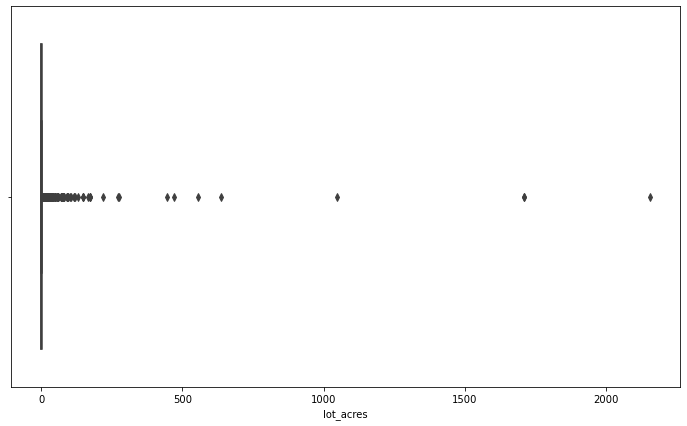

In [7]:
# plot a Box plot of column(s) with missing values to understand distribution
plt.figure(figsize=(12,7))
sns.boxplot(X.lot_acres)

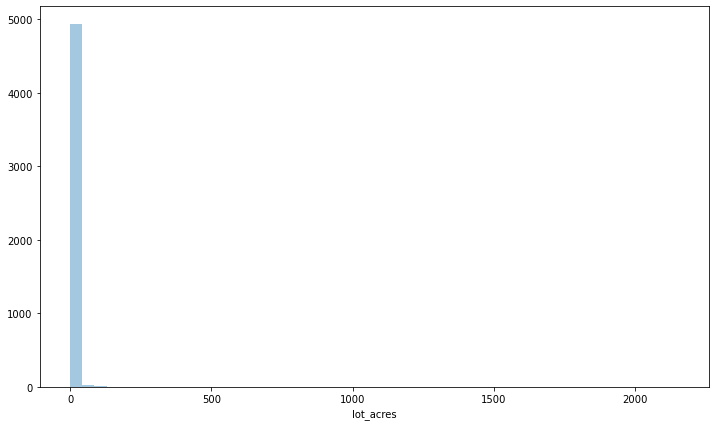

In [8]:
# Histrogram of column with missing value to try and understand skew before deciciding method of imputation
plt.figure(figsize=(12,7))
sns.distplot(a=X['lot_acres'], kde=False)

In [9]:
#since data was skewed to the right with a tail, I used Mode. you could choose between mode or median
#to impute your variables
X['lot_acres'] = X['lot_acres'].fillna(X['lot_acres'].mode()[0])

In [10]:
# code to fill empty spaces with NaN for modification to something that can later be manipulated.
X = X.replace(r'^\s*$', np.nan, regex=True)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         5000 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        4975 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [12]:
#fill Nan/Na values with 0, you could try and impute where necessary for model accuracy. 
X = X.fillna(0)

In [13]:
#fillna doesn't affect ["None"], therefore replace this with zero
colu = list(X.columns)
X = X[colu].replace(['None'], 0)

In [14]:
#brief summary of numerical columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         5000 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [15]:
# convert columns i think could be represented as different data types for better modeling
cols = ['sqrt_ft', 'garage']
X[cols] = X[cols].astype('float')
X.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces           object
floor_covering       object
HOA                  object
dtype: object

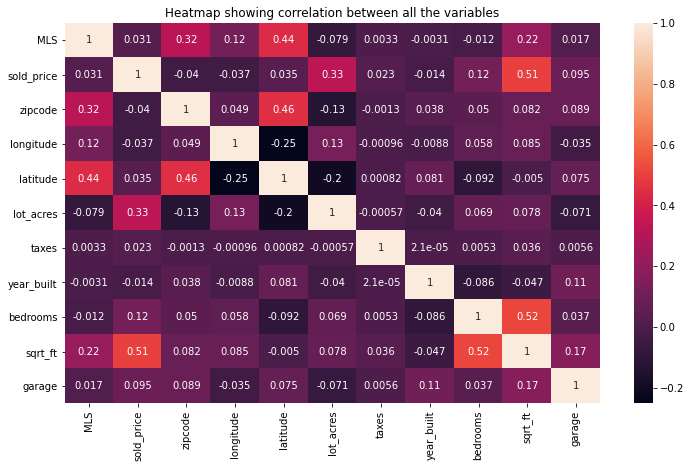

In [16]:
# Heatmap showing the correlation between the different data sets. 
# Set the width and height of the figure
plt.figure(figsize=(12,7))

# Add title
plt.title("Heatmap showing correlation between all the variables")

# Add label for horizontal axis
plt.xlabel("Variables")
plt.ylabel("Variables")

sns.heatmap(X.corr(), annot=True)

<Figure size 864x504 with 0 Axes>

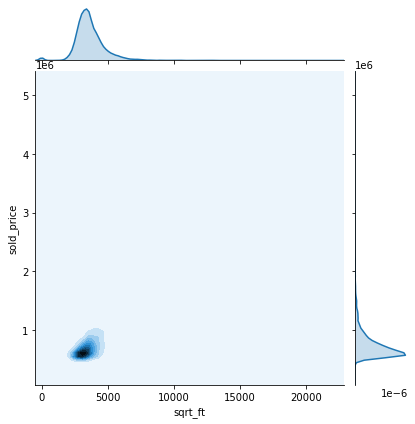

In [17]:
#a distribution plot comparing how year built relates with sold price
plt.figure(figsize=(12,7))
sns.jointplot(x=X['sqrt_ft'], y=X['sold_price'], kind="kde")

<Figure size 864x504 with 0 Axes>

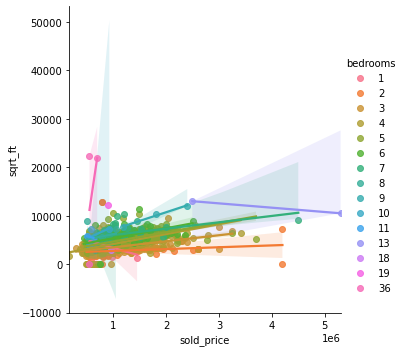

In [18]:
plt.figure(figsize=(12,7))
sns.lmplot(x="sold_price", y="sqrt_ft", hue="bedrooms", data=X)

Text(0.5, 1.0, 'Distribution of house selling price')

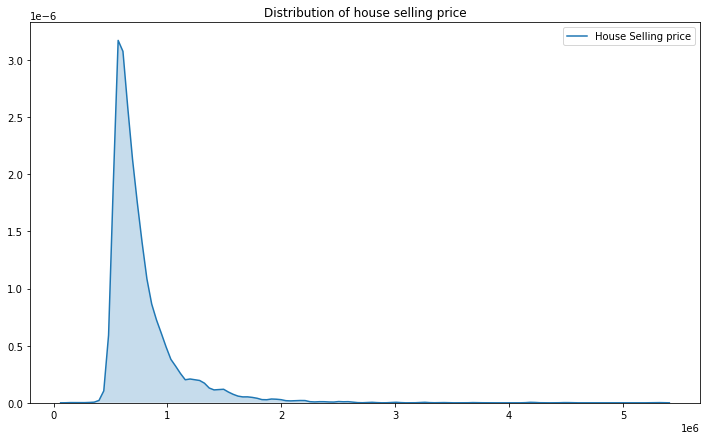

In [19]:
plt.figure(figsize=(12,7))

# KDE plots for house selling price
sns.kdeplot(data=X['sold_price'], label="House Selling price", shade=True)

# plot title
plt.title("Distribution of house selling price")

In [20]:
# extract names of all categorical columns classified as 'Object'
object_cols = [col for col in X.columns if X[col].dtype == "object"]

In [21]:
#encode the remaining object columns to have numerical representations that can be fed into a model
X_ohe = pd.get_dummies(X[object_cols], prefix=object_cols, drop_first=False)
X = pd.concat([X, X_ohe], axis=1)

In [22]:
#check to see if we still have object columns that were on hot encoded
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 2611 entries, MLS to HOA_99.66
dtypes: float64(7), int64(4), object(5), uint8(2595)
memory usage: 13.0+ MB


In [23]:
#drop all object columns that have been one hot encoded
X.drop(object_cols, axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 2606 entries, MLS to HOA_99.66
dtypes: float64(7), int64(4), uint8(2595)
memory usage: 12.8 MB


In [24]:
X.shape

(5000, 2606)

In [28]:
#Save processed file to a csv file you can easily share

X.to_csv('./output/submission.csv', index=False)